In [53]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Input 
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.utils import class_weight 

In [54]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import os 
os.listdir("/content/drive/MyDrive")

['creditcard.csv',
 'crop_yield.csv',
 'pneumonia_dataset.csv',
 'dynamic_supply_chain_logistics_dataset.csv',
 'ObesityDataSet_raw_and_data_sinthetic.csv',
 'credit_score_classification.csv',
 'Credit_scoring_Multiclass_classification']

In [56]:
data = pd.read_csv("/content/drive/MyDrive/pneumonia_dataset.csv") 

df = data.copy()

df = df.drop("PatientID",axis=1)

In [57]:
df 

,Gender,Age,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Xray,WBC_count,Sputum_color,Temperature,Diagnosis
0,M,3,Bloody,High,Mild,Mild,NaN,No,92,Yes,-,-,-,39.7,Yes
1,M,3,Dry,NaN,NaN,NaN,Mild,-,-,Yes,-,-,Clear,37.0,No
2,M,3,Dry,NaN,NaN,NaN,Mild,No,99,No,-,-,-,38.0,No
3,F,3,NaN,Low,Severe,NaN,Moderate,No,99,Yes,-,-,Clear,40.9,Yes
4,F,3,NaN,High,Moderate,Severe,Mild,-,91,No,-,-,Green,38.1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,F,90,Wet,NaN,Moderate,Moderate,Moderate,No,99,Yes,-,-,Green,38.3,Yes
706,F,90,Dry,High,Moderate,Moderate,Moderate,Yes,91,Yes,-,-,Bloody,37.2,Yes
707,M,90,Dry,NaN,NaN,NaN,Mild,No,90,Yes,-,-,-,37.0,No
708,M,90,NaN,Moderate,Severe,Severe,Moderate,No,93,Yes,-,-,Bloody,36.2,Yes


In [58]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)

,0
Gender,0.000000
Age,0.000000
Confusion,0.000000
Sputum_color,0.000000
WBC_count,0.000000
Xray,0.000000
Crackles,0.000000
Oxygen_saturation,0.000000
Diagnosis,0.000000
Temperature,0.000000


In [59]:
#We notice that in our dataset, we have many missing values and some "hyphen(-)" 
#represent missing values, what we are going to do now will be to replace those hyphen (-) by 
#"nan" that pandas does not interpret hyphen(-) values by real values 

new_df = df.replace('-', np.nan)

new_df 

,Gender,Age,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Xray,WBC_count,Sputum_color,Temperature,Diagnosis
0,M,3,Bloody,High,Mild,Mild,NaN,No,92,Yes,NaN,NaN,NaN,39.7,Yes
1,M,3,Dry,NaN,NaN,NaN,Mild,NaN,NaN,Yes,NaN,NaN,Clear,37.0,No
2,M,3,Dry,NaN,NaN,NaN,Mild,No,99,No,NaN,NaN,NaN,38.0,No
3,F,3,NaN,Low,Severe,NaN,Moderate,No,99,Yes,NaN,NaN,Clear,40.9,Yes
4,F,3,NaN,High,Moderate,Severe,Mild,NaN,91,No,NaN,NaN,Green,38.1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,F,90,Wet,NaN,Moderate,Moderate,Moderate,No,99,Yes,NaN,NaN,Green,38.3,Yes
706,F,90,Dry,High,Moderate,Moderate,Moderate,Yes,91,Yes,NaN,NaN,Bloody,37.2,Yes
707,M,90,Dry,NaN,NaN,NaN,Mild,No,90,Yes,NaN,NaN,NaN,37.0,No
708,M,90,NaN,Moderate,Severe,Severe,Moderate,No,93,Yes,NaN,NaN,Bloody,36.2,Yes


In [60]:
missing_ranking = (new_df.isnull().sum() / new_df.shape[0]).sort_values(ascending=True)

print(missing_ranking)

Gender                 0.000000
Age                    0.000000
Temperature            0.000000
Crackles               0.000000
Diagnosis              0.000000
Oxygen_saturation      0.084507
Sputum_color           0.092958
Confusion              0.105634
Fatigue                0.147887
Fever                  0.436620
Cough                  0.439437
Shortness_of_breath    0.446479
Chest_pain             0.483099
Xray                   0.985915
WBC_count              0.985915
dtype: float64


In [61]:
df_new = new_df.drop(columns =["WBC_count","Xray"],axis=1)

In [62]:
(df_new.isna().sum()/len(df_new)).sort_values(ascending=False)


,0
Chest_pain,0.483099
Shortness_of_breath,0.446479
Cough,0.439437
Fever,0.436620
Fatigue,0.147887
Confusion,0.105634
Sputum_color,0.092958
Oxygen_saturation,0.084507
Gender,0.000000
Age,0.000000


In [63]:
df_new.dtypes.value_counts()

,count
object,11
int64,1
float64,1


In [64]:
object_features = df_new.select_dtypes(['object']) 

object_missing_ranking = object_features.isnull().sum()/len(object_features)

object_missing_ranking.sort_values(ascending=False)

,0
Chest_pain,0.483099
Shortness_of_breath,0.446479
Cough,0.439437
Fever,0.436620
Fatigue,0.147887
Confusion,0.105634
Sputum_color,0.092958
Oxygen_saturation,0.084507
Gender,0.000000
Crackles,0.000000


In [65]:
object_features

,Gender,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Sputum_color,Diagnosis
0,M,Bloody,High,Mild,Mild,NaN,No,92,Yes,NaN,Yes
1,M,Dry,NaN,NaN,NaN,Mild,NaN,NaN,Yes,Clear,No
2,M,Dry,NaN,NaN,NaN,Mild,No,99,No,NaN,No
3,F,NaN,Low,Severe,NaN,Moderate,No,99,Yes,Clear,Yes
4,F,NaN,High,Moderate,Severe,Mild,NaN,91,No,Green,Yes
...,...,...,...,...,...,...,...,...,...,...,...
705,F,Wet,NaN,Moderate,Moderate,Moderate,No,99,Yes,Green,Yes
706,F,Dry,High,Moderate,Moderate,Moderate,Yes,91,Yes,Bloody,Yes
707,M,Dry,NaN,NaN,NaN,Mild,No,90,Yes,NaN,No
708,M,NaN,Moderate,Severe,Severe,Moderate,No,93,Yes,Bloody,Yes


In [66]:
numerical_features = df_new.select_dtypes(["int64","float64"])

numerical_features.isnull().sum()

,0
Age,0
Temperature,0


In [67]:
from sklearn.preprocessing import OrdinalEncoder 

encoder = OrdinalEncoder()

object_features_e = pd.DataFrame(encoder.fit_transform(object_features),columns=object_features.columns)

object_features_e 

,Gender,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Sputum_color,Diagnosis
0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,8.0,1.0,NaN,1.0
1,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,1.0,0.0
2,1.0,1.0,NaN,NaN,NaN,0.0,0.0,15.0,0.0,NaN,0.0
3,0.0,NaN,1.0,2.0,NaN,1.0,0.0,15.0,1.0,1.0,1.0
4,0.0,NaN,0.0,1.0,2.0,0.0,NaN,7.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
705,0.0,2.0,NaN,1.0,1.0,1.0,0.0,15.0,1.0,2.0,1.0
706,0.0,1.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,0.0,1.0
707,1.0,1.0,NaN,NaN,NaN,0.0,0.0,6.0,1.0,NaN,0.0
708,1.0,NaN,2.0,2.0,2.0,1.0,0.0,9.0,1.0,0.0,1.0


In [68]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

non_numerical_features_i_e = pd.DataFrame(imputer.fit_transform(object_features_e),columns=object_features_e.columns)

non_numerical_features_i_e 

,Gender,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Sputum_color,Diagnosis
0,1.0,0.0,0.0,0.0,0.0,0.6,0.0,8.0,1.0,2.2,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.2,8.0,1.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,1.4,0.0
3,0.0,1.6,1.0,2.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0
4,0.0,0.6,0.0,1.0,2.0,0.0,0.6,7.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
705,0.0,2.0,1.0,1.0,1.0,1.0,0.0,15.0,1.0,2.0,1.0
706,0.0,1.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,0.0,1.0
707,1.0,1.0,1.0,0.0,0.4,0.0,0.0,6.0,1.0,1.4,0.0
708,1.0,1.4,2.0,2.0,2.0,1.0,0.0,9.0,1.0,0.0,1.0


In [69]:
non_numerical_features_i_e.isna().sum()

,0
Gender,0
Cough,0
Fever,0
Shortness_of_breath,0
Chest_pain,0
Fatigue,0
Confusion,0
Oxygen_saturation,0
Crackles,0
Sputum_color,0


In [70]:
numerical_features.isna().sum()/numerical_features.shape[0]

,0
Age,0.0
Temperature,0.0


In [71]:
non_numerical_features_i_e.isna().sum()/non_numerical_features_i_e.shape[0]


,0
Gender,0.0
Cough,0.0
Fever,0.0
Shortness_of_breath,0.0
Chest_pain,0.0
Fatigue,0.0
Confusion,0.0
Oxygen_saturation,0.0
Crackles,0.0
Sputum_color,0.0


In [72]:
df_entire = pd.concat([numerical_features,non_numerical_features_i_e],axis=1)
df_entire

,Age,Temperature,Gender,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Sputum_color,Diagnosis
0,3,39.7,1.0,0.0,0.0,0.0,0.0,0.6,0.0,8.0,1.0,2.2,1.0
1,3,37.0,1.0,1.0,1.0,0.0,0.0,0.0,0.2,8.0,1.0,1.0,0.0
2,3,38.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,1.4,0.0
3,3,40.9,0.0,1.6,1.0,2.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0
4,3,38.1,0.0,0.6,0.0,1.0,2.0,0.0,0.6,7.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,90,38.3,0.0,2.0,1.0,1.0,1.0,1.0,0.0,15.0,1.0,2.0,1.0
706,90,37.2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,0.0,1.0
707,90,37.0,1.0,1.0,1.0,0.0,0.4,0.0,0.0,6.0,1.0,1.4,0.0
708,90,36.2,1.0,1.4,2.0,2.0,2.0,1.0,0.0,9.0,1.0,0.0,1.0


In [73]:
df_entire.isna().sum()

,0
Age,0
Temperature,0
Gender,0
Cough,0
Fever,0
Shortness_of_breath,0
Chest_pain,0
Fatigue,0
Confusion,0
Oxygen_saturation,0


Text(0.5, 1.0, 'Correlation between our variables')

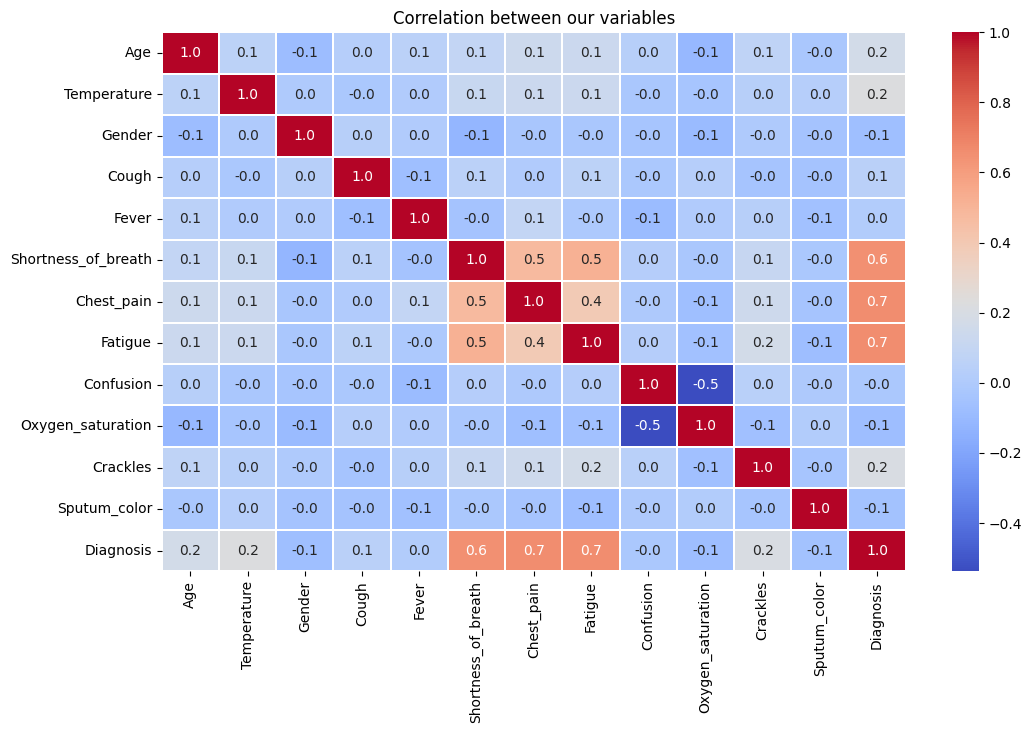

In [74]:
plt.figure(figsize=(12,7))
sns.heatmap(df_entire.corr(),annot=True,fmt=".1f",cmap="coolwarm",linewidths=0.2)
plt.title("Correlation between our variables")

In [75]:
X_ = df_entire.drop("Diagnosis",axis=1)

y_ = df_entire["Diagnosis"]
y_

,Diagnosis
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
705,1.0
706,1.0
707,0.0
708,1.0


In [76]:
# Create a dictionary to store the mappings
feature_matching = {}

# Loop through each column and its corresponding category list
for i, col_name in enumerate(object_features.columns):
    # encoder.categories_ contains the ordered list of unique labels for each column
    labels = encoder.categories_[i]
    
    # Create a sub-dictionary: { 'Category Name': Assigned_Integer }
    feature_matching[col_name] = {label: index for index, label in enumerate(labels)}

# Print the results clearly
for feature, mapping in feature_matching.items():
    print(f"--- Matching for {feature} ---")
    for category, value in mapping.items():
        print(f"  {category} -> {value}")
    print("\n")

--- Matching for Gender ---
  F -> 0
  M -> 1


--- Matching for Cough ---
  Bloody -> 0
  Dry -> 1
  Wet -> 2
  nan -> 3


--- Matching for Fever ---
  High -> 0
  Low -> 1
  Moderate -> 2
  nan -> 3


--- Matching for Shortness_of_breath ---
  Mild -> 0
  Moderate -> 1
  Severe -> 2
  nan -> 3


--- Matching for Chest_pain ---
  Mild -> 0
  Moderate -> 1
  Severe -> 2
  nan -> 3


--- Matching for Fatigue ---
  Mild -> 0
  Moderate -> 1
  Severe -> 2
  nan -> 3


--- Matching for Confusion ---
  No -> 0
  Yes -> 1
  nan -> 2


--- Matching for Oxygen_saturation ---
  100 -> 0
  85 -> 1
  86 -> 2
  87 -> 3
  88 -> 4
  89 -> 5
  90 -> 6
  91 -> 7
  92 -> 8
  93 -> 9
  94 -> 10
  95 -> 11
  96 -> 12
  97 -> 13
  98 -> 14
  99 -> 15
  nan -> 16


--- Matching for Crackles ---
  No -> 0
  Yes -> 1


--- Matching for Sputum_color ---
  Bloody -> 0
  Clear -> 1
  Green -> 2
  Yellow -> 3
  nan -> 4


--- Matching for Diagnosis ---
  No -> 0
  Yes -> 1




<Axes: xlabel='Diagnosis', ylabel='count'>

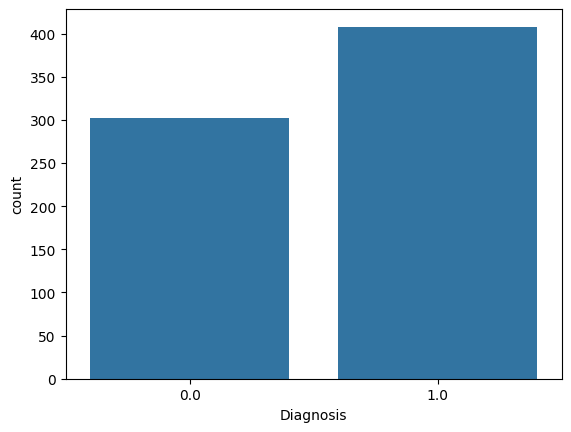

In [77]:
sns.countplot(x="Diagnosis",data = df_entire)

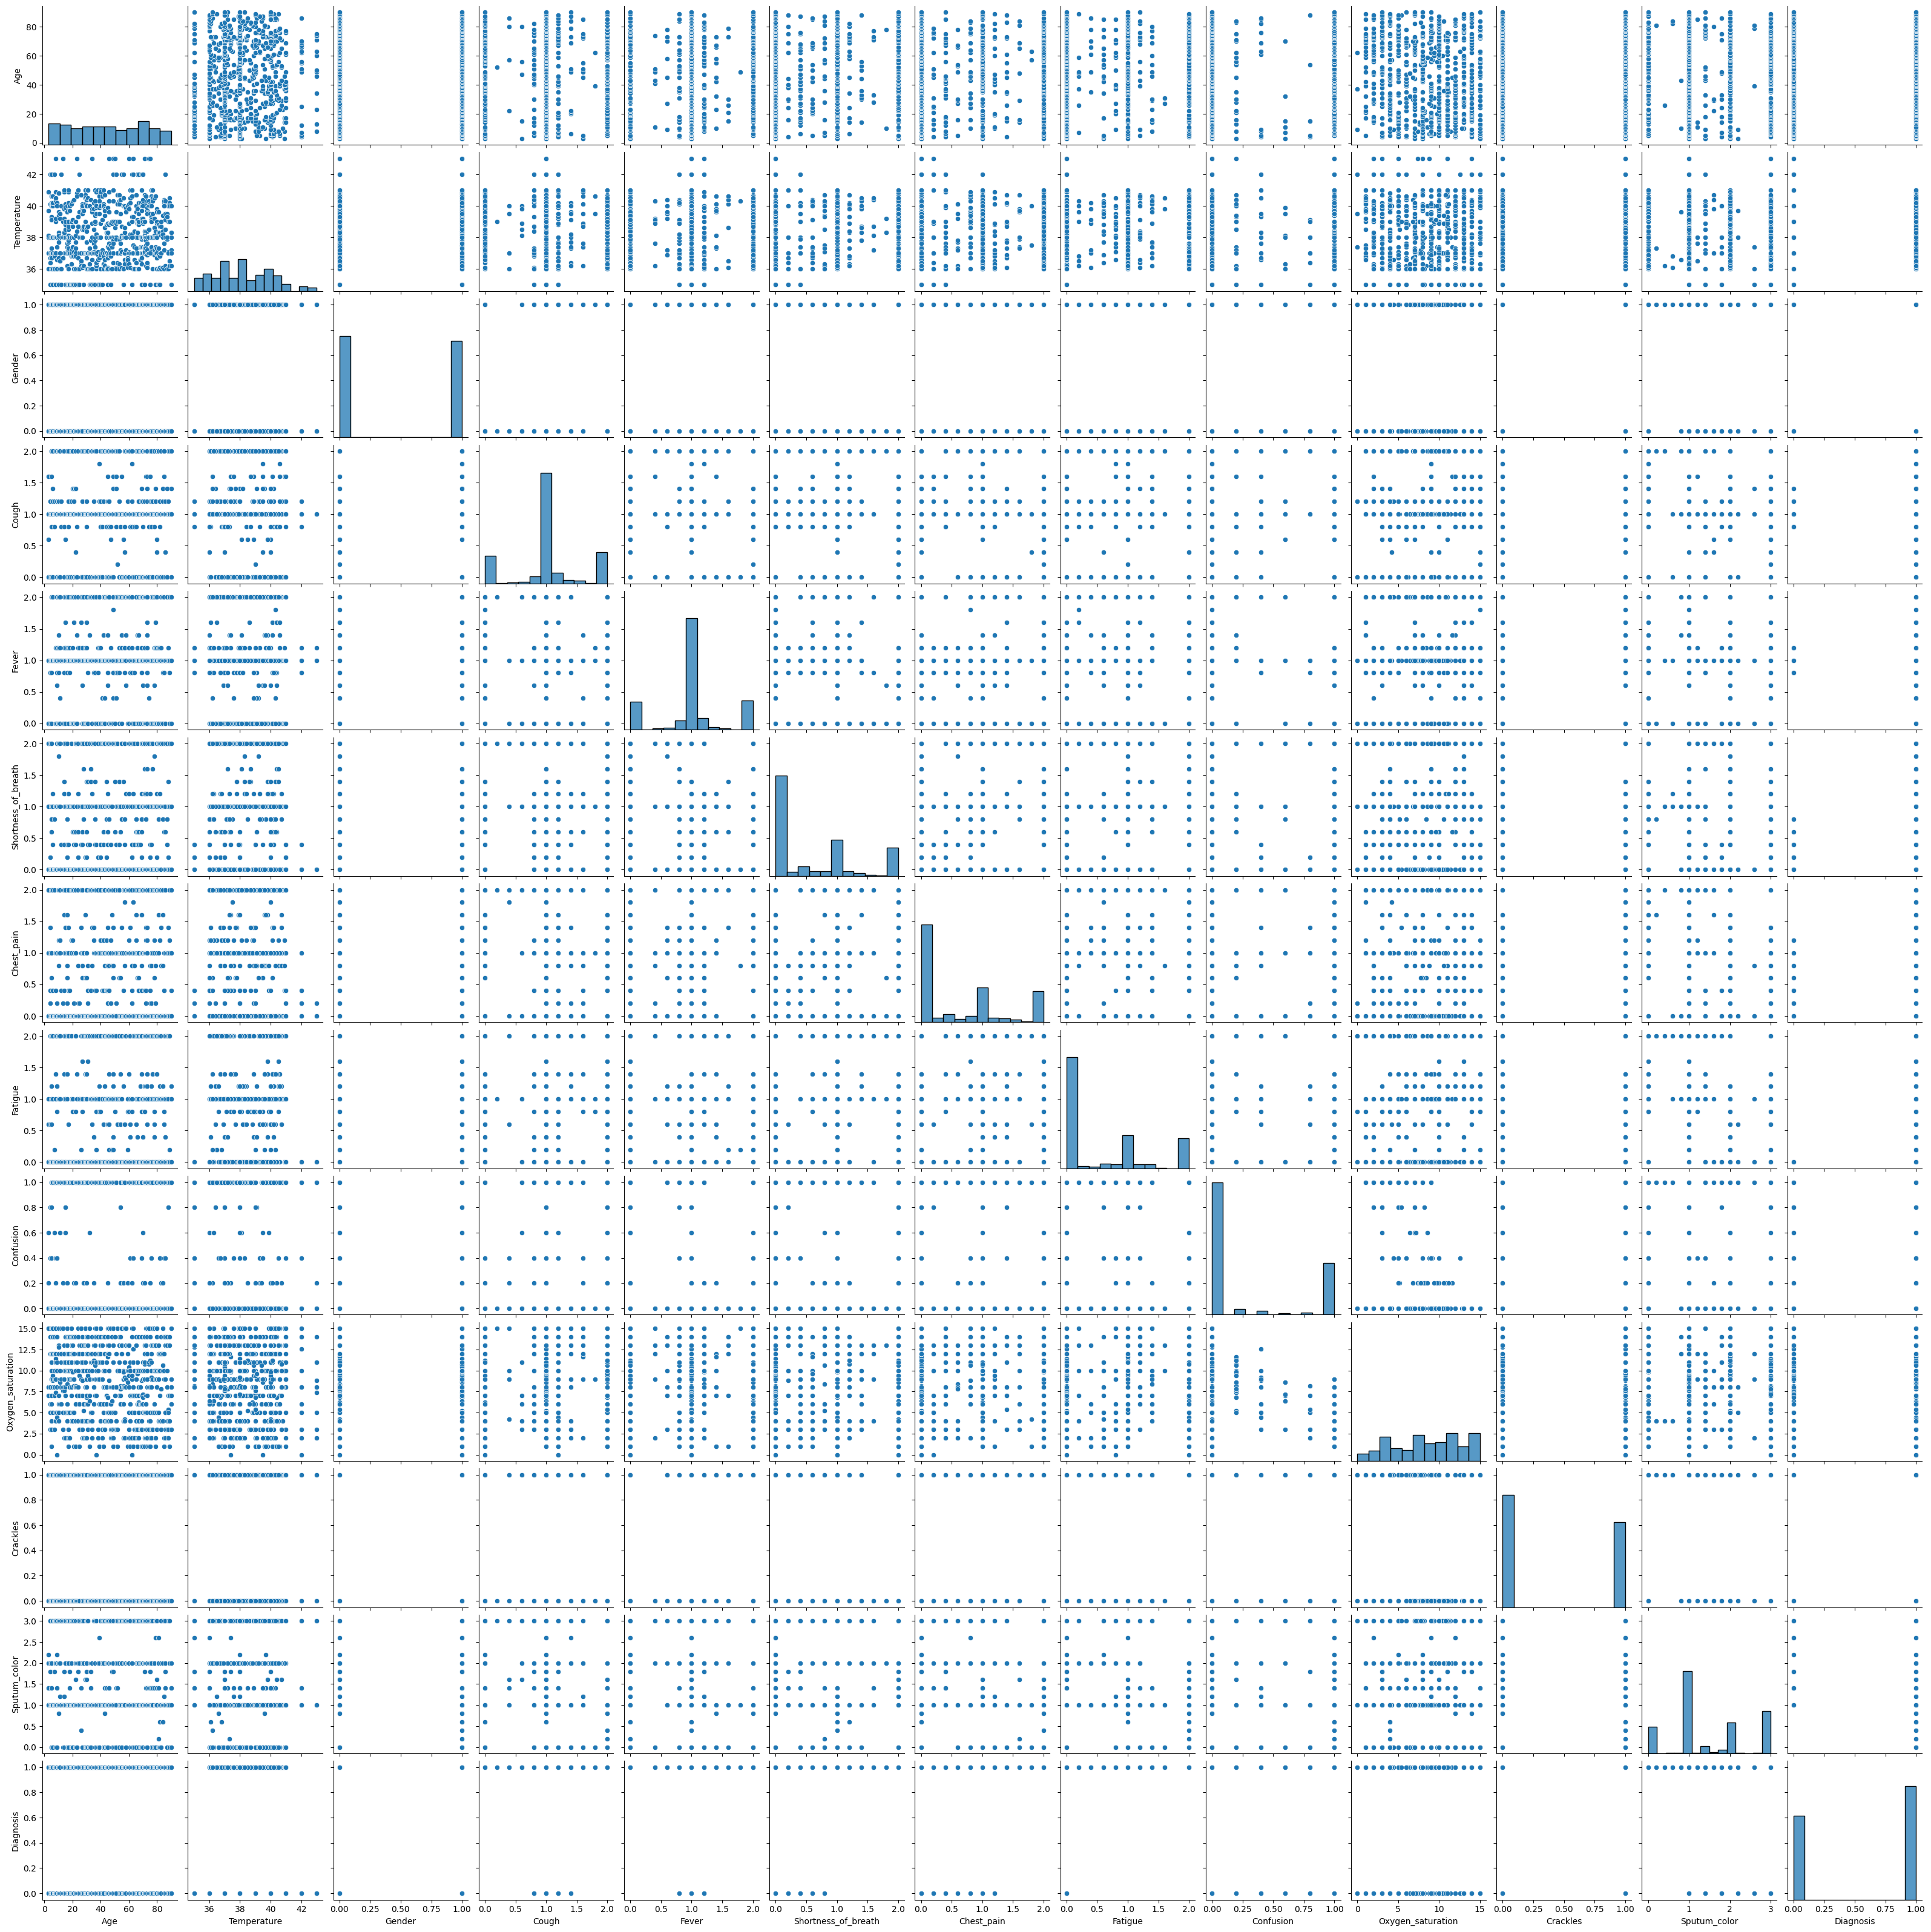

In [78]:
sns.pairplot(df_entire)

In [79]:
cor = X_.join(y_).corr()["Diagnosis"].drop("Diagnosis")
cor.sort_values(ascending = True)

,Diagnosis
Oxygen_saturation,-0.076548
Gender,-0.070685
Sputum_color,-0.053514
Confusion,-0.021181
Fever,0.009056
Cough,0.050222
Age,0.166676
Crackles,0.202253
Temperature,0.220723
Shortness_of_breath,0.646614


<Axes: >

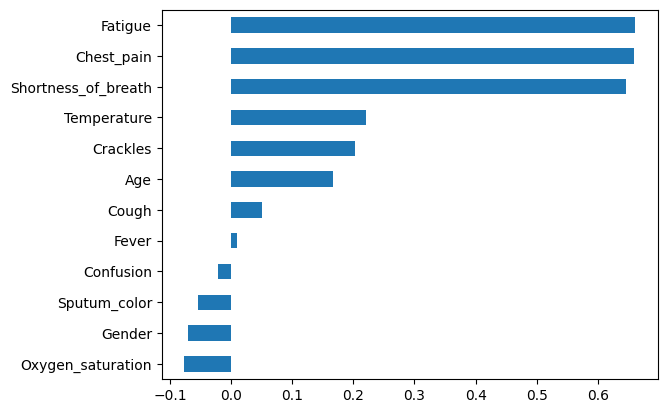

In [80]:
cor.sort_values().plot(kind="barh")

In [81]:
cor.abs().sort_values(ascending=False)

,Diagnosis
Fatigue,0.660991
Chest_pain,0.659726
Shortness_of_breath,0.646614
Temperature,0.220723
Crackles,0.202253
Age,0.166676
Oxygen_saturation,0.076548
Gender,0.070685
Sputum_color,0.053514
Cough,0.050222


In [82]:
df_entire

,Age,Temperature,Gender,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Sputum_color,Diagnosis
0,3,39.7,1.0,0.0,0.0,0.0,0.0,0.6,0.0,8.0,1.0,2.2,1.0
1,3,37.0,1.0,1.0,1.0,0.0,0.0,0.0,0.2,8.0,1.0,1.0,0.0
2,3,38.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,1.4,0.0
3,3,40.9,0.0,1.6,1.0,2.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0
4,3,38.1,0.0,0.6,0.0,1.0,2.0,0.0,0.6,7.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,90,38.3,0.0,2.0,1.0,1.0,1.0,1.0,0.0,15.0,1.0,2.0,1.0
706,90,37.2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,0.0,1.0
707,90,37.0,1.0,1.0,1.0,0.0,0.4,0.0,0.0,6.0,1.0,1.4,0.0
708,90,36.2,1.0,1.4,2.0,2.0,2.0,1.0,0.0,9.0,1.0,0.0,1.0


In [83]:
data_nm = data.copy()
data_nm.drop("PatientID",axis=1)

,Gender,Age,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Xray,WBC_count,Sputum_color,Temperature,Diagnosis
0,M,3,Bloody,High,Mild,Mild,NaN,No,92,Yes,-,-,-,39.7,Yes
1,M,3,Dry,NaN,NaN,NaN,Mild,-,-,Yes,-,-,Clear,37.0,No
2,M,3,Dry,NaN,NaN,NaN,Mild,No,99,No,-,-,-,38.0,No
3,F,3,NaN,Low,Severe,NaN,Moderate,No,99,Yes,-,-,Clear,40.9,Yes
4,F,3,NaN,High,Moderate,Severe,Mild,-,91,No,-,-,Green,38.1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,F,90,Wet,NaN,Moderate,Moderate,Moderate,No,99,Yes,-,-,Green,38.3,Yes
706,F,90,Dry,High,Moderate,Moderate,Moderate,Yes,91,Yes,-,-,Bloody,37.2,Yes
707,M,90,Dry,NaN,NaN,NaN,Mild,No,90,Yes,-,-,-,37.0,No
708,M,90,NaN,Moderate,Severe,Severe,Moderate,No,93,Yes,-,-,Bloody,36.2,Yes


In [84]:
X = data_nm.drop(columns=["PatientID","Xray","WBC_count","Diagnosis"],axis=1) 
X

,Gender,Age,Cough,Fever,Shortness_of_breath,Chest_pain,Fatigue,Confusion,Oxygen_saturation,Crackles,Sputum_color,Temperature
0,M,3,Bloody,High,Mild,Mild,NaN,No,92,Yes,-,39.7
1,M,3,Dry,NaN,NaN,NaN,Mild,-,-,Yes,Clear,37.0
2,M,3,Dry,NaN,NaN,NaN,Mild,No,99,No,-,38.0
3,F,3,NaN,Low,Severe,NaN,Moderate,No,99,Yes,Clear,40.9
4,F,3,NaN,High,Moderate,Severe,Mild,-,91,No,Green,38.1
...,...,...,...,...,...,...,...,...,...,...,...,...
705,F,90,Wet,NaN,Moderate,Moderate,Moderate,No,99,Yes,Green,38.3
706,F,90,Dry,High,Moderate,Moderate,Moderate,Yes,91,Yes,Bloody,37.2
707,M,90,Dry,NaN,NaN,NaN,Mild,No,90,Yes,-,37.0
708,M,90,NaN,Moderate,Severe,Severe,Moderate,No,93,Yes,Bloody,36.2


In [85]:
y = data_nm["Diagnosis"]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enco = le.fit_transform(y)

y_df = pd.DataFrame(y_enco,columns=[y.name])

mapping = dict(zip(le.classes_,range(len(le.classes_))))

print(mapping)
y_df

{'No': 0, 'Yes': 1}


,Diagnosis
0,1
1,0
2,0
3,1
4,1
...,...
705,1
706,1
707,0
708,1


<Axes: >

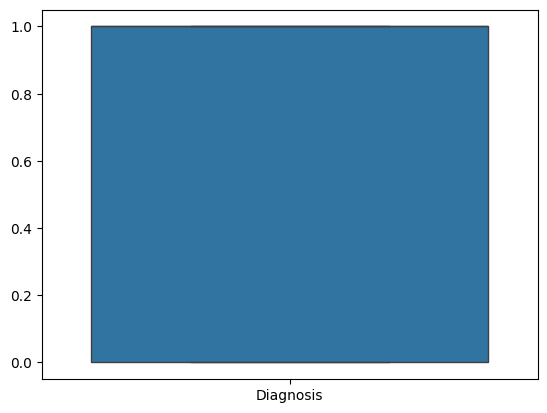

In [86]:
sns.boxplot(y_df)

## Preprocessing

In [87]:
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures 


In [88]:
numerical_variables = make_column_selector(dtype_include=np.number)
numerical_variables = numerical_variables(X)


non_numerical_variables = make_column_selector(dtype_exclude=np.number)
non_numerical_variables = non_numerical_variables(X)

In [89]:
print(numerical_variables)
print(non_numerical_variables)

['Age', 'Temperature']
['Gender', 'Cough', 'Fever', 'Shortness_of_breath', 'Chest_pain', 'Fatigue', 'Confusion', 'Oxygen_saturation', 'Crackles', 'Sputum_color']


In [90]:
numerical_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(1))


non_numerical_pipeline = make_pipeline(OneHotEncoder(sparse_output=False),KNNImputer(), 
                                    PolynomialFeatures(1),StandardScaler())
                                    

In [91]:
non_numerical_pipeline

Pipeline(steps=[('onehotencoder', OneHotEncoder(sparse_output=False)),
                ('knnimputer', KNNImputer()),
                ('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler())])

In [92]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_variables),
                                       (non_numerical_pipeline,non_numerical_variables))

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=1))]),
                                 ['Age', 'Temperature']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('knnimputer', KNNImputer()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(degree=1)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Gender', 'Cough', 'Fever',
                                  'Shortness_of_breath', 'Chest_pain',
                                  'Fatigue', 'Confusion', 'Oxygen_saturation',
                                  'Crackles', 'Sputum_color'])])

In [93]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test =  train_test_split(X,y_df,test_size = 0.15,random_state=42)


In [94]:
X_train_lavé = preprocessor.fit_transform(X_train,y_train) 

X_train_lavé

array([[ 1.        ,  1.66917909, -1.18542108, ...,  1.18019369,
        -0.39672363, -0.5216818 ],
       [ 1.        , -1.43250153, -0.42492828, ..., -0.84731855,
        -0.39672363,  1.91687731],
       [ 1.        , -0.17612457,  0.49852726, ..., -0.84731855,
         2.52064645, -0.5216818 ],
       ...,
       [ 1.        , -0.45095703,  2.61704292, ...,  1.18019369,
        -0.39672363, -0.5216818 ],
       [ 1.        ,  0.41280213, -1.18542108, ...,  1.18019369,
        -0.39672363, -0.5216818 ],
       [ 1.        , -1.23619263,  0.55284818, ...,  1.18019369,
        -0.39672363, -0.5216818 ]])

In [95]:
X_test_lavé = preprocessor.transform(X_test)

## Neural Network Model Building

In [96]:
print(X_train.shape)
print(X_train_lavé.shape)
print(X_test_lavé.shape)

(603, 12)
(603, 53)
(107, 53)


In [97]:
neural_network = Sequential([Input(shape=(X_train_lavé.shape[1],)),
                             Dense(64,activation="relu"),
                             Dropout(0.2),
                             Dense(32,activation="relu"),
                             Dropout(0.2), 
                             Dense(1,activation="sigmoid")])

neural_network.compile(optimizer = "adam",
                       loss = "binary_crossentropy",
                       metrics = ["accuracy",
                                  tf.keras.metrics.Precision(),
                                  tf.keras.metrics.Recall(),
                                  tf.keras.metrics.AUC()
                                  ])


early_stop = EarlyStopping(monitor="val_loss",
                           patience=3,
                           restore_best_weights=True)



Réseau_de_neurones = neural_network.fit(X_train_lavé,y_train,
                                        validation_split =0.15,
                                        epochs = 40,
                                        batch_size = 250,
                                        callbacks=[early_stop])




Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.5656 - auc_1: 0.6170 - loss: 0.7030 - precision_1: 0.5812 - recall_1: 0.8526 - val_accuracy: 0.6154 - val_auc_1: 0.7469 - val_loss: 0.6505 - val_precision_1: 0.5802 - val_recall_1: 0.9792
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6605 - auc_1: 0.7079 - loss: 0.6238 - precision_1: 0.6447 - recall_1: 0.9206 - val_accuracy: 0.6484 - val_auc_1: 0.8207 - val_loss: 0.6052 - val_precision_1: 0.6026 - val_recall_1: 0.9792
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6625 - auc_1: 0.7435 - loss: 0.5971 - precision_1: 0.6487 - recall_1: 0.9123 - val_accuracy: 0.6923 - val_auc_1: 0.8738 - val_loss: 0.5644 - val_precision_1: 0.6351 - val_recall_1: 0.9792
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7179 - auc_1: 0.8159 - loss: 0.5532 - precision_1: 0.6881 - recall_1: 0.9304 - val_accuracy: 0.7363 - val_auc_1: 0.9092 - val_loss: 0.5256 - val_precision_1: 0.6714 - val_recall_1: 0.

In [98]:
neural_network.evaluate(X_test_lavé,y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9515 - auc_1: 0.9955 - loss: 0.1092 - precision_1: 1.0000 - recall_1: 0.9206


[0.1313573718070984, 0.9439252614974976, 1.0, 0.90625, 0.9938226938247681]

In [99]:
from sklearn.metrics import classification_report,confusion_matrix


predit = neural_network.predict(X_test_lavé)

y_pred = (predit>0.5)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[43  0]
 [ 6 58]]

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.91      0.95        64

    accuracy                           0.94       107
   macro avg       0.94      0.95      0.94       107
weighted avg       0.95      0.94      0.94       107



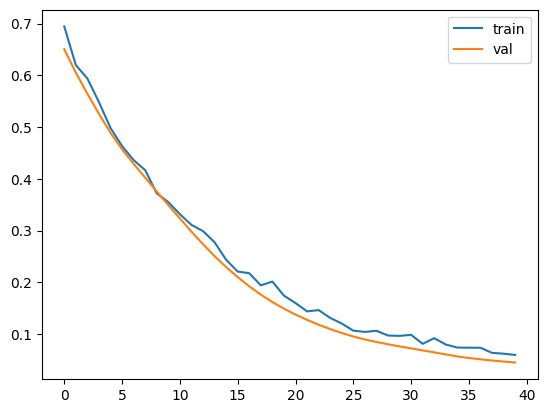

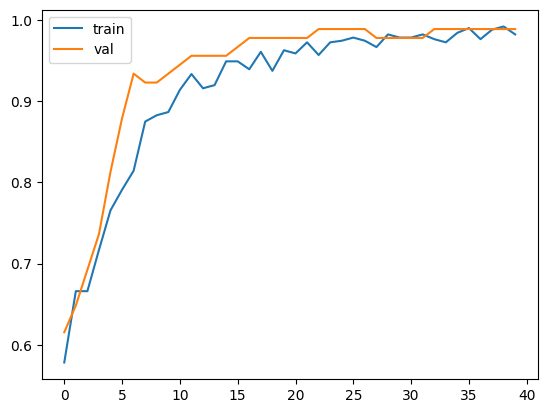

In [100]:
import matplotlib.pyplot as plt

plt.plot(Réseau_de_neurones.history["loss"])
plt.plot(Réseau_de_neurones.history["val_loss"])
plt.legend(["train","val"])
plt.show()

plt.plot(Réseau_de_neurones.history["accuracy"])
plt.plot(Réseau_de_neurones.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()


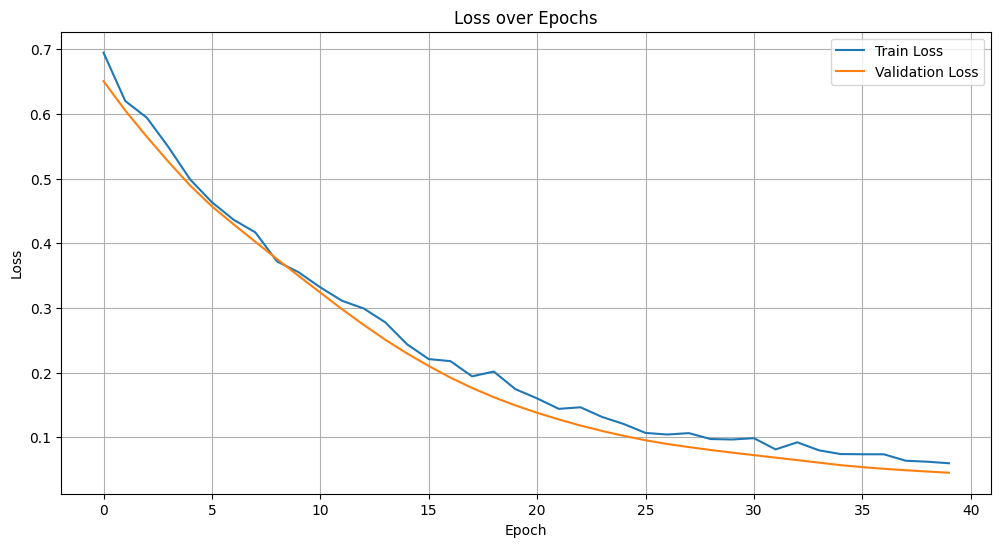

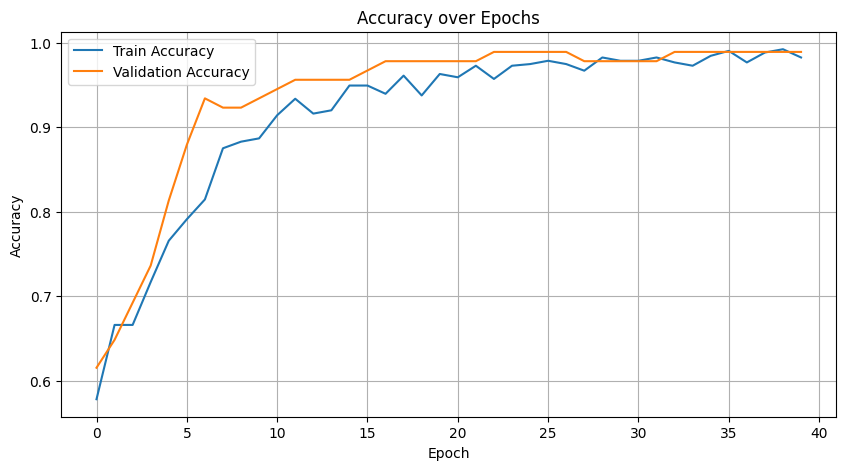

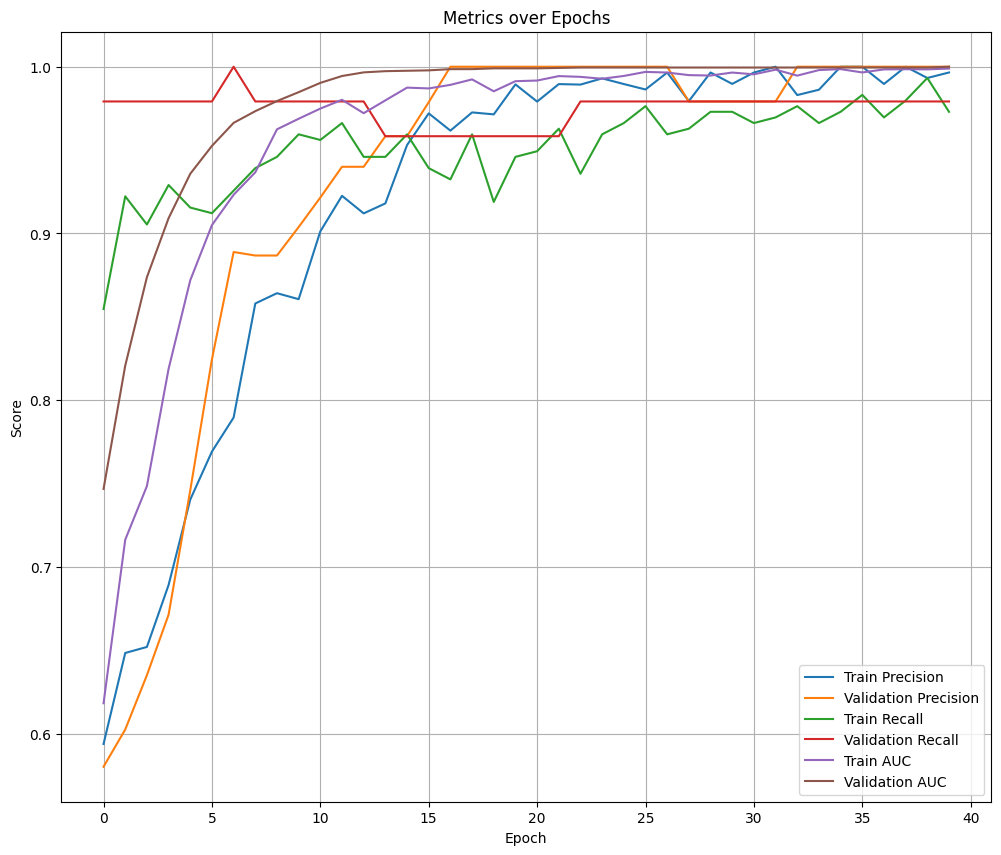

In [108]:
import matplotlib.pyplot as plt

# Loss curves
plt.figure(figsize=(12,6))
#plt.subplot(3,1,3)
plt.plot(Réseau_de_neurones.history['loss'], label='Train Loss')
plt.plot(Réseau_de_neurones.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- Accuracy curves ---
plt.figure(figsize=(10,5))
plt.plot(Réseau_de_neurones.history['accuracy'], label='Train Accuracy')
plt.plot(Réseau_de_neurones.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,10))

# --- Optional: other metrics (Precision, Recall, AUC) ---
plt.plot(Réseau_de_neurones.history['precision_1'], label='Train Precision')
plt.plot(Réseau_de_neurones.history['val_precision_1'], label='Validation Precision')
plt.plot(Réseau_de_neurones.history['recall_1'], label='Train Recall')
plt.plot(Réseau_de_neurones.history['val_recall_1'], label='Validation Recall')
plt.plot(Réseau_de_neurones.history['auc_1'], label='Train AUC')
plt.plot(Réseau_de_neurones.history['val_auc_1'], label='Validation AUC')
plt.title('Metrics over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

#dict_keys(['accuracy', 'auc_2', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_auc_2', 'val_loss', 'val_precision_2', 'val_recall_2'])

In [110]:
print(Réseau_de_neurones.history.keys())


dict_keys(['accuracy', 'auc_1', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_auc_1', 'val_loss', 'val_precision_1', 'val_recall_1'])


## Overview of our neural network

In [111]:
print(neural_network.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,709 (65.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,140 (43.52 KB)

None


In [112]:
!pip install pydot graphviz

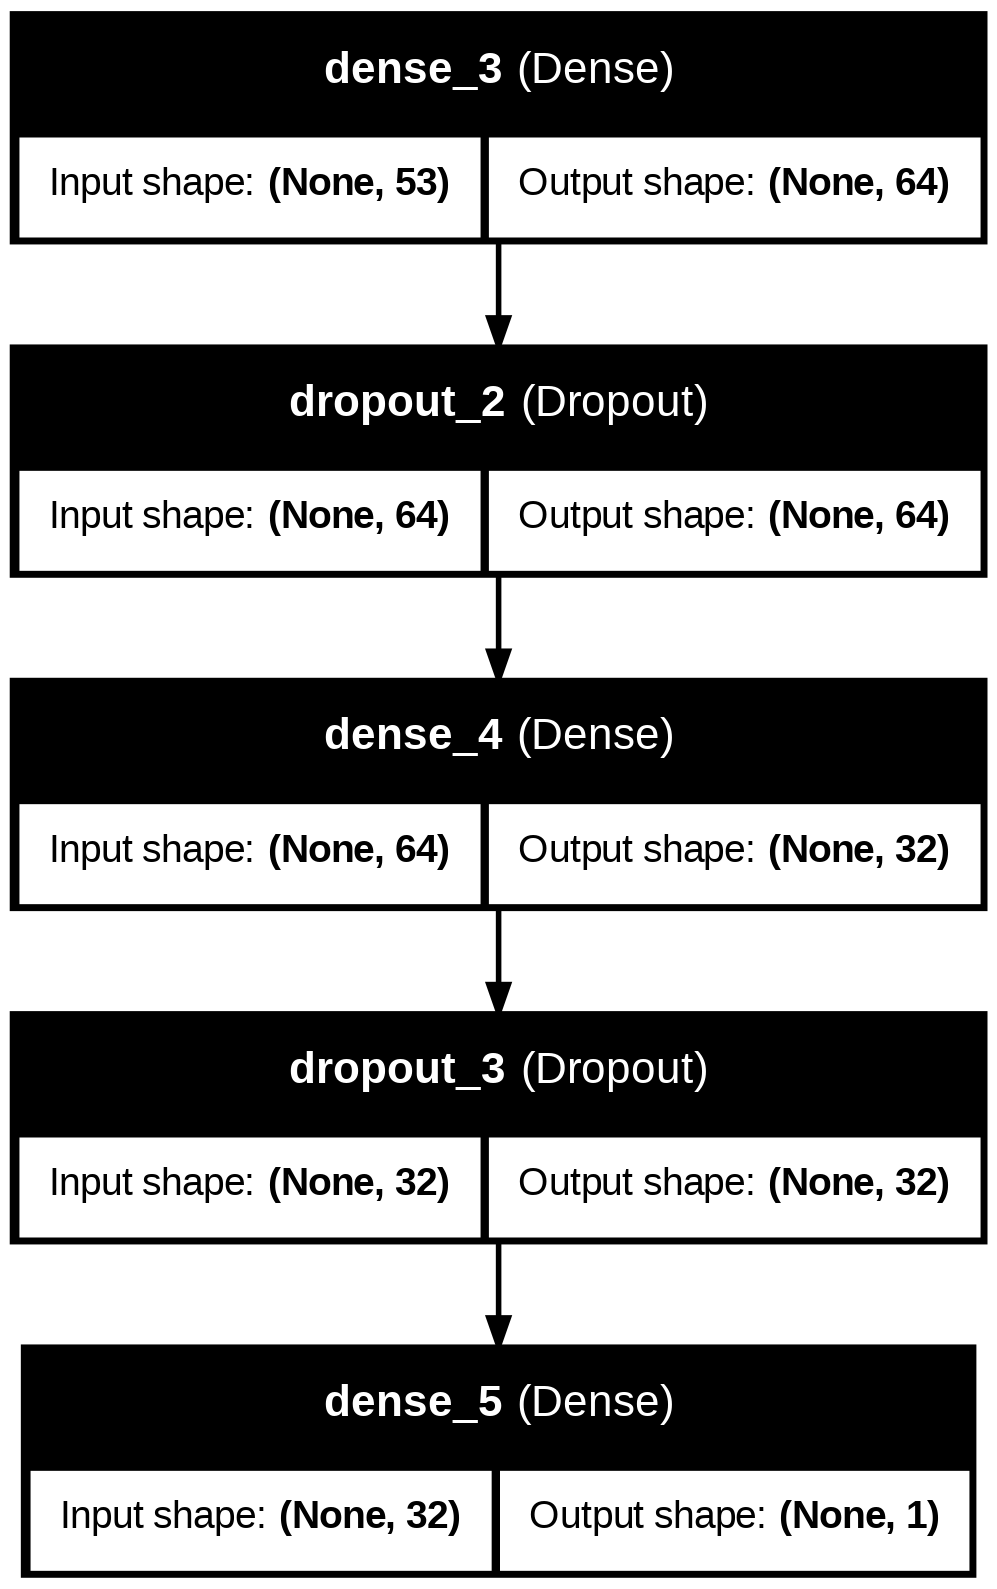

In [113]:
from tensorflow.keras.utils import plot_model

plot_model(neural_network,
           to_file = "neural_network.png",
           show_shapes=True,
           show_layer_names = True)